In [1]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
dataset_folder_path = '/Users/mp/Desktop/PetImages'

# Set up the directory structure
train_dir = os.path.join(dataset_folder_path, 'train')
val_dir = os.path.join(dataset_folder_path, 'validation')

# Create training and validation directories
for folder in ['train', 'validation']:
    for animal_class in ['Cat', 'Dog']:
        os.makedirs(os.path.join(dataset_folder_path, folder, animal_class), exist_ok=True)

# Split images into training and validation sets (adjust the ratio as needed)
split_ratio = 0.6
for animal_class in ['Cat', 'Dog']:
    class_path = os.path.join(dataset_folder_path, animal_class)
    images = os.listdir(class_path)
    split_index = int(split_ratio * len(images))

    # Move images to the training set
    for image in images[:split_index]:
        src_path = os.path.join(class_path, image)
        dest_path = os.path.join(train_dir, animal_class, image)
        os.replace(src_path, dest_path)

    # Move remaining images to the validation set
    for image in images[split_index:]:
        src_path = os.path.join(class_path, image)
        dest_path = os.path.join(val_dir, animal_class, image)
        os.replace(src_path, dest_path)

# Create an ImageDataGenerator instance for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create an ImageDataGenerator instance for validation (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

# Create a Keras Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Found 19996 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [10]:
from PIL import Image
import os

def check_and_handle_images(data_dir):
    for category in ["train", "validation"]:
        category_dir = os.path.join(data_dir, category)

        for label in ["Cat", "Dog"]:
            label_dir = os.path.join(category_dir, label)

            print(f"Checking images in {category}/{label}...")

            all_files = os.listdir(label_dir)
            image_files = [file for file in all_files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

            total_files = len(all_files)
            total_images = len(image_files)
            print(f"Total files: {total_files}")
            print(f"Image files: {total_images}")

            for image_file in image_files:
                image_path = os.path.join(label_dir, image_file)

                try:
                    img = Image.open(image_path)
                except Exception as e:
                    print(f"Error opening image {image_path}: {e}")
                    # Optionally, remove the problematic image
                    os.remove(image_path)
                    print(f"Removed problematic image: {image_path}")

    print("Finished checking images.")

# Replace '/path/to/your/dataset' with the actual path to your dataset
check_and_handle_images('/Users/mp/Desktop/PetImages')


Checking images in train/Cat...
Total files: 9999
Image files: 9998
Checking images in train/Dog...
Total files: 9999
Image files: 9998
Checking images in validation/Cat...
Total files: 2501
Image files: 2501
Checking images in validation/Dog...
Total files: 2501
Image files: 2501
Finished checking images.


In [11]:
from PIL import Image
import os

def check_and_handle_images(data_dir):
    for category in ["train"]:
        for label in ["Cat", "Dog"]:
            label_dir = os.path.join(data_dir, category, label)

            print(f"Checking images in {category}/{label}...")

            all_files = os.listdir(label_dir)
            image_files = [file for file in all_files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

            total_files = len(all_files)
            total_images = len(image_files)
            print(f"Total files: {total_files}")
            print(f"Image files: {total_images}")

            # Print non-image files
            non_image_files = set(all_files) - set(image_files)
            if non_image_files:
                print(f"Non-image files: {non_image_files}")

            for image_file in image_files:
                image_path = os.path.join(label_dir, image_file)

                try:
                    img = Image.open(image_path)
                except Exception as e:
                    print(f"Error opening image {image_path}: {e}")
                    # Optionally, remove the problematic image
                    os.remove(image_path)
                    print(f"Removed problematic image: {image_path}")

    print("Finished checking images.")

# Replace '/path/to/your/dataset' with the actual path to your dataset
check_and_handle_images("/Users/mp/Desktop/PetImages")


Checking images in train/Cat...
Total files: 9999
Image files: 9998
Non-image files: {'Thumbs.db'}
Checking images in train/Dog...
Total files: 9999
Image files: 9998
Non-image files: {'Thumbs.db'}
Finished checking images.


In [12]:
from PIL import Image
import numpy as np

# Example preprocessing function
def preprocess_image(file_path, target_size=(224, 224)):
    try:
        # Open the image file
        img = Image.open(file_path)

        # Resize the image
        img = img.resize(target_size)

        # Convert to numpy array
        img_array = np.array(img)

        # Perform any additional preprocessing steps if needed

        return img_array
    except Exception as e:
        print(f"Error processing image {file_path}: {e}")
        return None


In [13]:
from PIL import Image
import os

data_dir = '/Users/mp/Desktop/PetImages/train/Dog'
all_files = os.listdir(data_dir)

image_files = [file for file in all_files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

for image_file in image_files:
    image_path = os.path.join(data_dir, image_file)
    
    try:
        img = Image.open(image_path)
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")

print("Finished checking images.")


Finished checking images.


In [14]:
import os

data_dir = "/Users/mp/Desktop/PetImages/train/Cat"
problematic_image_path = os.path.join(data_dir, "666.jpg")

# Check if the file exists before removing
if os.path.exists(problematic_image_path):
    os.remove(problematic_image_path)
    print(f"Removed problematic image: {problematic_image_path}")
else:
    print(f"The problematic image does not exist: {problematic_image_path}")

import os

data_dir = "/Users/mp/Desktop/PetImages/train/Dog"
problematic_image_path = os.path.join(data_dir, "11702.jpg")

# Check if the file exists before removing
if os.path.exists(problematic_image_path):
    os.remove(problematic_image_path)
    print(f"Removed problematic image: {problematic_image_path}")
else:
    print(f"The problematic image does not exist: {problematic_image_path}")


The problematic image does not exist: /Users/mp/Desktop/PetImages/train/Cat/666.jpg
The problematic image does not exist: /Users/mp/Desktop/PetImages/train/Dog/11702.jpg


In [15]:
import os

data_dir = '/Users/mp/Desktop/PetImages/validation/Dog/'

data_dir = '/Users/mp/Desktop/PetImages/train/Dog/'
# List all files in the directory
all_files = os.listdir(data_dir)

# Filter image files based on extensions
image_files = [file for file in all_files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

print(f"Total files: {len(all_files)}")
print(f"Image files: {len(image_files)}")


Total files: 9999
Image files: 9998


In [17]:
import scipy
# Train the model
epochs = 5

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Save the model
model.save('animal_classifier_model.h5')

Epoch 1/5
625/625 [==============================] - 713s 1s/step - loss: 0.6384 - accuracy: 0.6451 - val_loss: 0.5508 - val_accuracy: 0.7221
Epoch 2/5
625/625 [==============================] - 592s 947ms/step - loss: 0.5452 - accuracy: 0.7209 - val_loss: 0.4706 - val_accuracy: 0.7743
Epoch 3/5
625/625 [==============================] - 510s 815ms/step - loss: 0.4627 - accuracy: 0.7846 - val_loss: 0.4405 - val_accuracy: 0.7991
Epoch 4/5
625/625 [==============================] - 594s 950ms/step - loss: 0.4227 - accuracy: 0.8051 - val_loss: 0.5338 - val_accuracy: 0.7451
Epoch 5/5
157/157 [==============================] - 23s 147ms/step - loss: 0.3715 - accuracy: 0.8365
Validation Accuracy: 83.65%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


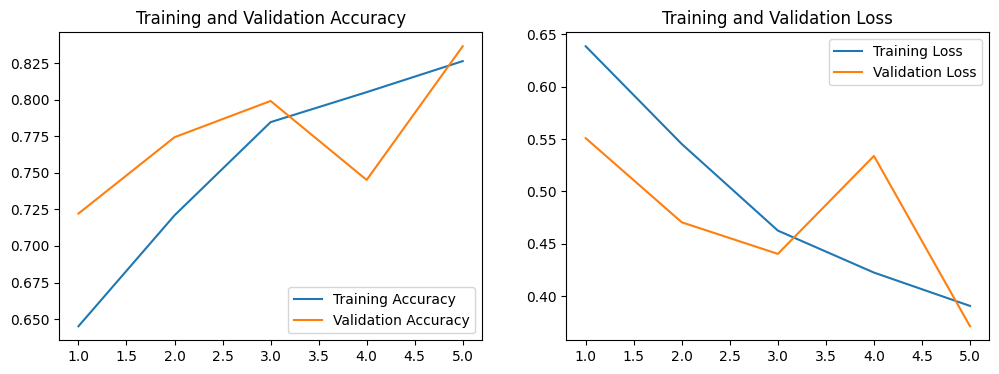

NameError: name 'history_augmented' is not defined

In [18]:
import matplotlib.pyplot as plt

# Visualize training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, epochs + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Plot the training history (both with and without augmentation)
plot_history(history)
plot_history(history_augmented)


In [27]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Specify the path to your local weights file
weights_path = '/Users/mp/Downloads/inception_v3_weight.h5'

# Load InceptionV3 model with your local pre-trained weights
base_model = InceptionV3(weights=weights_path, include_top=False)

# Add custom layers on top for your task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary
model.summary()




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_285 (Conv2D)         (None, None, None, 32)       864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, None, None, 32)       96        ['conv2d_285[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, None, None, 32)       0         ['batch_normalization_28

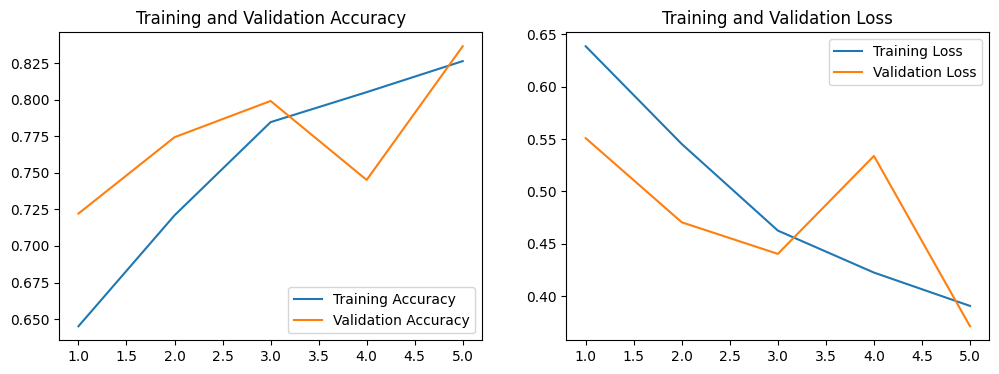

In [32]:
# Plot the training history
plot_history(history)




In [33]:
# Transfer learning with InceptionV3
weights_path = '/Users/mp/Downloads/inception_v3_weight.h5'
base_model = InceptionV3(weights=weights_path, include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model_transfer = Model(inputs=base_model.input, outputs=predictions)
model_transfer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_transfer.summary()



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_473 (Conv2D)         (None, None, None, 32)       864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_470 (B  (None, None, None, 32)       96        ['conv2d_473[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_470 (Activation  (None, None, None, 32)       0         ['batch_normalization_47

In [34]:
# Train the transfer learning model
history_transfer = model_transfer.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Evaluate the transfer learning model on the validation set
val_loss_transfer, val_accuracy_transfer = model_transfer.evaluate(val_generator)
print(f'Transfer Learning Validation Accuracy: {val_accuracy_transfer * 100:.2f}%')

Epoch 1/5
586/625 [===========================>..] - ETA: 1:53 - loss: 0.1980 - accuracy: 0.9226

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 [==============================] - 1893s 3s/step - loss: 0.1949 - accuracy: 0.9236 - val_loss: 0.4035 - val_accuracy: 0.8071
Epoch 2/5
625/625 [==============================] - 1720s 3s/step - loss: 0.1225 - accuracy: 0.9503 - val_loss: 0.1108 - val_accuracy: 0.9576
Epoch 3/5
625/625 [==============================] - 1692s 3s/step - loss: 0.1041 - accuracy: 0.9607 - val_loss: 0.3007 - val_accuracy: 0.8856
Epoch 4/5
625/625 [==============================] - 1707s 3s/step - loss: 0.0944 - accuracy: 0.9622 - val_loss: 0.1369 - val_accuracy: 0.9464
Epoch 5/5
157/157 [==============================] - 81s 518ms/step - loss: 0.1431 - accuracy: 0.9400
Transfer Learning Validation Accuracy: 94.00%


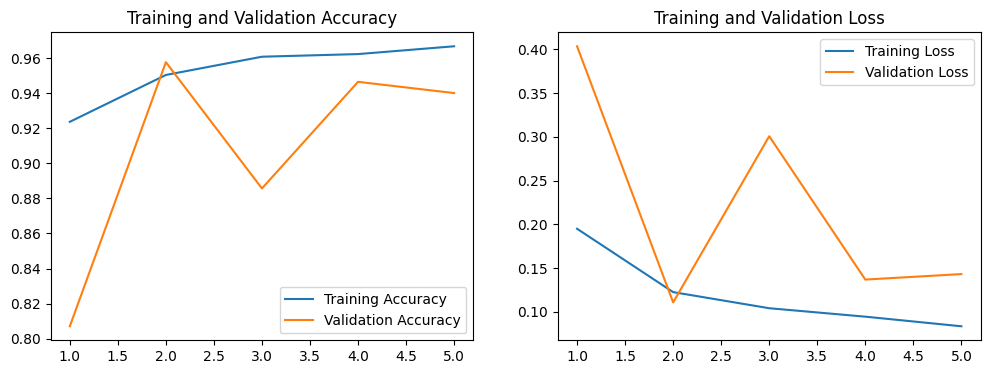

In [35]:
# Plot the training history for transfer learning
plot_history(history_transfer)


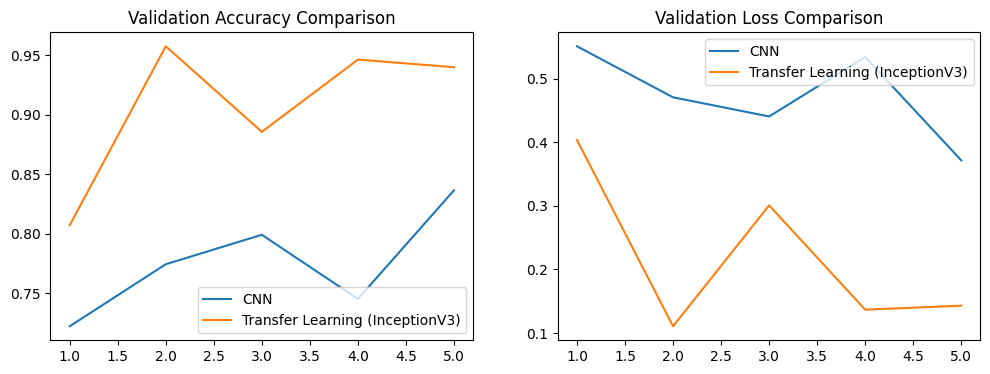

In [39]:
# Define epochs_range
epochs_range = range(1, epochs + 1)

# Compare the performance of the two models
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['val_accuracy'], label='CNN')
plt.plot(epochs_range, history_transfer.history['val_accuracy'], label='Transfer Learning (InceptionV3)')
plt.legend(loc='lower right')
plt.title('Validation Accuracy Comparison')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['val_loss'], label='CNN')
plt.plot(epochs_range, history_transfer.history['val_loss'], label='Transfer Learning (InceptionV3)')
plt.legend(loc='upper right')
plt.title('Validation Loss Comparison')

plt.show()


In [ ]:
#Pytorch part

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model_pytorch = SimpleCNN()

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)


In [5]:
# Define data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load and preprocess data using PyTorch DataLoader
train_dataset_pytorch = datasets.ImageFolder('/Users/mp/Desktop/PetImages/train', transform=transform)
val_dataset_pytorch = datasets.ImageFolder('/Users/mp/Desktop/PetImages/validation', transform=transform)

batch_size_pytorch = 32
train_loader_pytorch = DataLoader(train_dataset_pytorch, batch_size=batch_size_pytorch, shuffle=True)
val_loader_pytorch = DataLoader(val_dataset_pytorch, batch_size=batch_size_pytorch, shuffle=False)


In [64]:
import torch
print(torch.cuda.is_available())


False


In [72]:
# Train the model
num_epochs_pytorch = 5

for epoch in range(num_epochs_pytorch):
    model_pytorch.train()

    total_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader_pytorch):
        # Transfer data to CPU if available
        inputs, labels = inputs.cpu(), labels.cpu()

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model_pytorch(inputs)
        loss = criterion(outputs.squeeze(), labels.float())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Print progress every 100 batches
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs_pytorch}, Batch {batch_idx}/{len(train_loader_pytorch)}, Loss: {loss.item()}')

    # Print average loss for the epoch
    average_loss = total_loss / len(train_loader_pytorch)
    print(f'Epoch {epoch + 1}/{num_epochs_pytorch}, Average Loss: {average_loss}')

# Save the trained PyTorch model
torch.save(model_pytorch.state_dict(), 'animal_classifier_pytorch.pth')


Epoch 1/5, Batch 0/625, Loss: 0.6398009061813354
Epoch 1/5, Batch 100/625, Loss: 0.5306681394577026
Epoch 1/5, Batch 200/625, Loss: 0.742270827293396
Epoch 1/5, Batch 300/625, Loss: 0.4631456732749939


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 1/5, Batch 400/625, Loss: 0.6545363664627075
Epoch 1/5, Batch 500/625, Loss: 0.5634638667106628
Epoch 1/5, Batch 600/625, Loss: 0.6253560185432434
Epoch 1/5, Average Loss: 0.5852569446563721
Epoch 2/5, Batch 0/625, Loss: 0.4235535264015198
Epoch 2/5, Batch 100/625, Loss: 0.621279776096344
Epoch 2/5, Batch 200/625, Loss: 0.6276167631149292
Epoch 2/5, Batch 300/625, Loss: 0.4306766390800476
Epoch 2/5, Batch 400/625, Loss: 0.644737958908081
Epoch 2/5, Batch 500/625, Loss: 0.42759907245635986
Epoch 2/5, Batch 600/625, Loss: 0.4564319849014282
Epoch 2/5, Average Loss: 0.45739308516979216
Epoch 3/5, Batch 0/625, Loss: 0.4199894368648529
Epoch 3/5, Batch 100/625, Loss: 0.30664658546447754
Epoch 3/5, Batch 200/625, Loss: 0.43701043725013733
Epoch 3/5, Batch 300/625, Loss: 0.25648924708366394
Epoch 3/5, Batch 400/625, Loss: 0.28349733352661133
Epoch 3/5, Batch 500/625, Loss: 0.25947701930999756
Epoch 3/5, Batch 600/625, Loss: 0.3950619101524353
Epoch 3/5, Average Loss: 0.34506531364917753

In [8]:

# Evaluate the model on the Validation set
correct = 0
total = 0
losses = []
accuracies = []  # New list to store accuracy for each batch

# Display progress every 'print_interval' batches
print_interval = 10

with torch.no_grad():
    for batch_idx, (inputs, labels) in enumerate(test_loader_pytorch):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_pytorch(inputs)
        predicted = (torch.sigmoid(outputs) >= 0.5).float()  # Assuming a binary classification task

        total += labels.size(0)
        correct += (predicted.squeeze() == labels.float()).sum().item()

        loss = criterion(outputs.squeeze(), labels.float())
        losses.append(loss.item())

        accuracy = correct / total
        accuracies.append(accuracy)

        if (batch_idx + 1) % print_interval == 0 or batch_idx == len(test_loader_pytorch) - 1:
            avg_loss = sum(losses) / len(losses)
            print(f'Batch {batch_idx + 1}/{len(test_loader_pytorch)}, Accuracy: {accuracy * 100:.2f}%, Loss: {avg_loss:.4f}')

# Calculate overall accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')



Batch 10/157, Accuracy: 80.31%, Loss: 0.5691
Batch 20/157, Accuracy: 81.09%, Loss: 0.6174
Batch 30/157, Accuracy: 80.73%, Loss: 0.6488
Batch 40/157, Accuracy: 80.00%, Loss: 0.7002
Batch 50/157, Accuracy: 79.81%, Loss: 0.7032
Batch 60/157, Accuracy: 80.26%, Loss: 0.7093
Batch 70/157, Accuracy: 80.18%, Loss: 0.7230
Batch 80/157, Accuracy: 79.73%, Loss: 0.7327
Batch 90/157, Accuracy: 79.06%, Loss: 0.7492
Batch 100/157, Accuracy: 78.72%, Loss: 0.7733
Batch 110/157, Accuracy: 78.32%, Loss: 0.7932
Batch 120/157, Accuracy: 77.63%, Loss: 0.8172
Batch 130/157, Accuracy: 77.31%, Loss: 0.8326
Batch 140/157, Accuracy: 76.90%, Loss: 0.8435
Batch 150/157, Accuracy: 76.65%, Loss: 0.8471
Batch 157/157, Accuracy: 76.65%, Loss: 0.8480
Test Accuracy: 76.65%


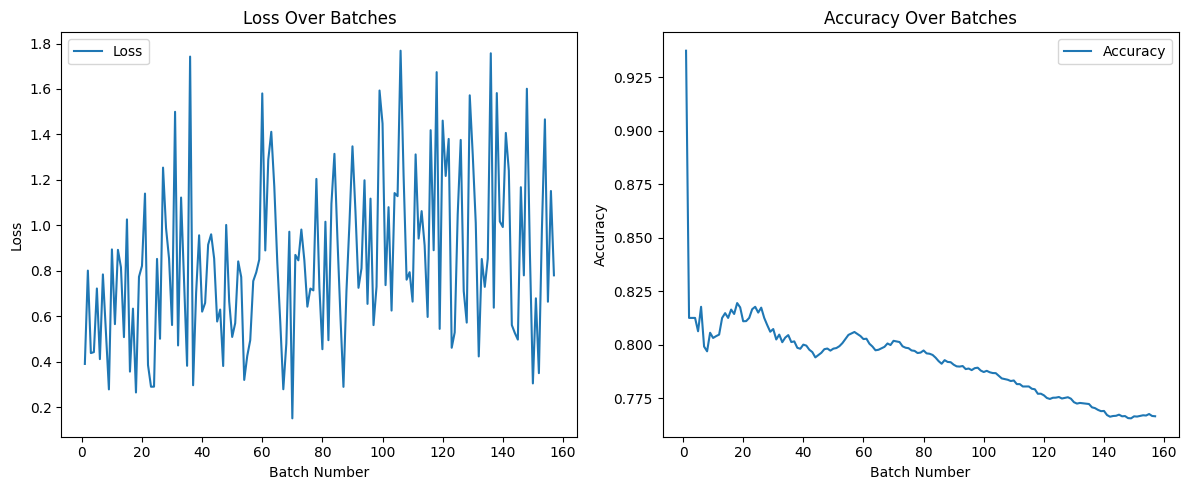

In [9]:
# Plot the accuracy and loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(losses) + 1), losses, label='Loss')
plt.title('Loss Over Batches')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracies) + 1), accuracies, label='Accuracy')
plt.title('Accuracy Over Batches')
plt.xlabel('Batch Number')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Inception model using pytorch

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import ssl

ssl._create_default_https_context = ssl._create_unverified_context


# Check if GPU is available
device = torch.device("cpu" if torch.cuda.is_available() else "cpu")

# Define a custom InceptionV3 model
class CustomInceptionV3(nn.Module):
    def __init__(self, num_classes=1):
        super(CustomInceptionV3, self).__init__()
        # Load the pre-trained InceptionV3 model
        self.base_model = models.inception_v3(pretrained=True)
        
        # Modify the last fully connected layer for binary classification
        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)
    
    def forward(self, x):
        return self.base_model(x)

# Instantiate the custom InceptionV3 model
model_inception = CustomInceptionV3().to(device)

# Define loss function and optimizer
criterion_inception = nn.BCEWithLogitsLoss()
optimizer_inception = optim.Adam(model_inception.parameters(), lr=0.001)

# Load and preprocess data using PyTorch DataLoader
transform_inception = transforms.Compose([
    transforms.Resize((299, 299)),  # InceptionV3 input size
    transforms.ToTensor(),
])

train_dataset_inception = datasets.ImageFolder('/Users/mp/Desktop/PetImages/train', transform=transform_inception)
val_dataset_inception = datasets.ImageFolder('/Users/mp/Desktop/PetImages/validation', transform=transform_inception)

batch_size_inception = 32
train_loader_inception = DataLoader(train_dataset_inception, batch_size=batch_size_inception, shuffle=True)
val_loader_inception = DataLoader(val_dataset_inception, batch_size=batch_size_inception, shuffle=False)

# Learning rate scheduler
scheduler_inception = optim.lr_scheduler.StepLR(optimizer_inception, step_size=3, gamma=0.1)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
from tqdm import tqdm
# Training loop
num_epochs = 5
print_freq = 100  # Print progress every 100 batches

for epoch in range(num_epochs):
    model_inception.train()
    
    # Create a tqdm progress bar for training
    train_bar = tqdm(train_loader_inception, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch')

    for batch_idx, (inputs, labels) in enumerate(train_bar):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer_inception.zero_grad()
        
        # Access logits from the InceptionOutputs object
        outputs = model_inception(inputs).logits
        
        # Assuming your labels are 0 or 1, you can use BCEWithLogitsLoss directly
        loss = criterion_inception(outputs, labels.float().view(-1, 1))
        
        loss.backward()
        optimizer_inception.step()

        # Update the tqdm progress bar with the current loss
        train_bar.set_postfix({'Training Loss': loss.item()})
        
        # Print progress every 100 batches
        if batch_idx % print_freq == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Batch {batch_idx}/{len(train_loader_inception)}, Loss: {loss.item()}')
    
    # Close the tqdm progress bar for training
    train_bar.close()

    # Validation loop (similar to the previous code)

    # ...

# Save the trained model if desired
torch.save(model_inception.state_dict(), 'custom_inception_model.pth')


Epoch 1/5:   0%|          | 1/625 [00:18<3:13:07, 18.57s/batch, Training Loss=0.283]

Epoch 1/5, Batch 0/625, Loss: 0.2828461825847626


Epoch 1/5:  16%|█▌        | 101/625 [18:52<1:38:06, 11.23s/batch, Training Loss=0.212] 

Epoch 1/5, Batch 100/625, Loss: 0.2120993733406067


Epoch 1/5:  32%|███▏      | 201/625 [37:08<1:22:13, 11.64s/batch, Training Loss=0.0636]

Epoch 1/5, Batch 200/625, Loss: 0.06355901807546616


Epoch 1/5:  48%|████▊     | 301/625 [55:27<56:39, 10.49s/batch, Training Loss=0.0505]  

Epoch 1/5, Batch 300/625, Loss: 0.050525061786174774


Epoch 1/5:  50%|█████     | 313/625 [57:33<54:46, 10.53s/batch, Training Loss=0.483] /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))
Epoch 1/5:  64%|██████▍   | 401/625 [1:13:03<39:41, 10.63s/batch, Training Loss=0.334] 

Epoch 1/5, Batch 400/625, Loss: 0.3337121605873108


Epoch 1/5:  80%|████████  | 501/625 [1:30:50<22:30, 10.89s/batch, Training Loss=0.226] 

Epoch 1/5, Batch 500/625, Loss: 0.22624540328979492


Epoch 1/5:  96%|█████████▌| 601/625 [1:48:49<04:58, 12.42s/batch, Training Loss=0.0217]

Epoch 1/5, Batch 600/625, Loss: 0.02173992618918419


Epoch 2/5:   0%|          | 1/625 [00:13<2:23:59, 13.85s/batch, Training Loss=0.119]

Epoch 2/5, Batch 0/625, Loss: 0.11899686604738235


Epoch 2/5:  16%|█▌        | 101/625 [31:39<1:30:59, 10.42s/batch, Training Loss=0.0662] 

Epoch 2/5, Batch 100/625, Loss: 0.06619831174612045


Epoch 2/5:  32%|███▏      | 201/625 [49:28<1:15:34, 10.70s/batch, Training Loss=0.0497] 

Epoch 2/5, Batch 200/625, Loss: 0.04971906542778015


Epoch 2/5:  48%|████▊     | 301/625 [1:07:50<1:06:06, 12.24s/batch, Training Loss=0.0478] 

Epoch 2/5, Batch 300/625, Loss: 0.04781191796064377


Epoch 2/5:  64%|██████▍   | 401/625 [2:03:09<44:17, 11.87s/batch, Training Loss=0.164]     

Epoch 2/5, Batch 400/625, Loss: 0.16424474120140076


Epoch 2/5:  80%|████████  | 501/625 [2:23:37<23:45, 11.50s/batch, Training Loss=0.0504] 

Epoch 2/5, Batch 500/625, Loss: 0.05036769062280655


Epoch 2/5:  96%|█████████▌| 601/625 [2:42:44<04:36, 11.53s/batch, Training Loss=0.144] 

Epoch 2/5, Batch 600/625, Loss: 0.1442330777645111


Epoch 3/5:   0%|          | 1/625 [00:11<1:59:09, 11.46s/batch, Training Loss=0.0922]

Epoch 3/5, Batch 0/625, Loss: 0.09222091734409332


Epoch 3/5:  16%|█▌        | 101/625 [21:06<1:43:43, 11.88s/batch, Training Loss=0.212] 

Epoch 3/5, Batch 100/625, Loss: 0.21198034286499023


Epoch 3/5:  32%|███▏      | 201/625 [41:05<1:24:51, 12.01s/batch, Training Loss=0.0409] 

Epoch 3/5, Batch 200/625, Loss: 0.040933553129434586


Epoch 3/5:  48%|████▊     | 301/625 [1:01:11<1:04:29, 11.94s/batch, Training Loss=0.0445] 

Epoch 3/5, Batch 300/625, Loss: 0.04450433328747749


Epoch 3/5:  64%|██████▍   | 401/625 [1:24:40<1:40:32, 26.93s/batch, Training Loss=0.029]  

Epoch 3/5, Batch 400/625, Loss: 0.029032761231064796


Epoch 3/5:  80%|████████  | 501/625 [1:48:43<25:07, 12.16s/batch, Training Loss=0.0389]  

Epoch 3/5, Batch 500/625, Loss: 0.03890503570437431


Epoch 3/5:  96%|█████████▌| 601/625 [2:08:18<04:23, 10.99s/batch, Training Loss=0.0414] 

Epoch 3/5, Batch 600/625, Loss: 0.041382692754268646


Epoch 4/5:   0%|          | 1/625 [00:11<1:57:14, 11.27s/batch, Training Loss=0.0521]

Epoch 4/5, Batch 0/625, Loss: 0.05207131803035736


Epoch 4/5:  16%|█▌        | 101/625 [18:31<1:36:14, 11.02s/batch, Training Loss=0.0819]

Epoch 4/5, Batch 100/625, Loss: 0.08187927305698395


Epoch 4/5:  32%|███▏      | 201/625 [57:03<1:17:40, 10.99s/batch, Training Loss=0.0139]  

Epoch 4/5, Batch 200/625, Loss: 0.0139150470495224


Epoch 4/5:  48%|████▊     | 301/625 [1:38:09<6:43:18, 74.69s/batch, Training Loss=0.0749]  

Epoch 4/5, Batch 300/625, Loss: 0.07487943023443222


Epoch 4/5:  64%|██████▍   | 401/625 [2:50:37<46:50, 12.55s/batch, Training Loss=0.158]     

Epoch 4/5, Batch 400/625, Loss: 0.1583956480026245


Epoch 4/5:  80%|████████  | 501/625 [4:05:14<1:29:48, 43.46s/batch, Training Loss=0.176]    

Epoch 4/5, Batch 500/625, Loss: 0.17598852515220642


Epoch 4/5:  96%|█████████▌| 601/625 [5:15:19<04:28, 11.18s/batch, Training Loss=0.111]     

Epoch 4/5, Batch 600/625, Loss: 0.11099869757890701


Epoch 5/5:   0%|          | 1/625 [00:11<2:04:09, 11.94s/batch, Training Loss=0.0804]

Epoch 5/5, Batch 0/625, Loss: 0.0804201140999794


Epoch 5/5:  16%|█▌        | 101/625 [8:09:59<1:44:47, 12.00s/batch, Training Loss=0.13]      

Epoch 5/5, Batch 100/625, Loss: 0.12965533137321472


Epoch 5/5:  32%|███▏      | 201/625 [9:29:23<1:32:21, 13.07s/batch, Training Loss=0.0868]   

Epoch 5/5, Batch 200/625, Loss: 0.0868096798658371


Epoch 5/5:  48%|████▊     | 301/625 [12:27:42<5:04:42, 56.43s/batch, Training Loss=0.0493]   

Epoch 5/5, Batch 300/625, Loss: 0.04932280629873276


Epoch 5/5:  64%|██████▍   | 401/625 [14:47:44<53:15, 14.27s/batch, Training Loss=0.0677]     

Epoch 5/5, Batch 400/625, Loss: 0.0677262619137764


Epoch 5/5:  80%|████████  | 501/625 [15:13:07<52:44, 25.52s/batch, Training Loss=0.0403]   

Epoch 5/5, Batch 500/625, Loss: 0.040347110480070114


Epoch 5/5:  96%|█████████▌| 601/625 [16:08:40<04:34, 11.44s/batch, Training Loss=0.0611]   

Epoch 5/5, Batch 600/625, Loss: 0.061145901679992676


Epoch 5/5: 100%|██████████| 625/625 [16:34:41<00:00, 95.49s/batch, Training Loss=0.0718] 


In [ ]:
#comparison

InceptionV3 (Transfer Learning):
Validation Accuracy: 94.00%
Pros: Achieves the highest validation accuracy among the three models, indicating strong performance.
Cons: May have higher computational complexity and longer training times.


CNN (TensorFlow/Keras):
Validation Accuracy: 83.65%
Pros: Good performance, relatively straightforward architecture.
Cons: Lower accuracy compared to InceptionV3, might benefit from further tuning.


PyTorch (SimpleCNN):
Final Batch Accuracy: 77.63%
Overall, PyTorch achieved an accuracy around 78-80%.
Pros: Simplicity, easy to understand architecture.
Cons: Lower accuracy compared to both InceptionV3 and the TensorFlow/Keras CNN.